In [ ]:
# web scraping: se trata de coger datos de una pag web, para ello usaremos 2 librerias 
# una es beautifulsoup + requests

import requests
from bs4 import BeautifulSoup
import sys # libreria de sistema 

url = "https://www.elperiodico.com/es/"
url2 = "https://www.lavanguardia.com/"
url3 = "https://www.infojobs.net/"

# definir headers para evitar bloqueos, de esta version en adelante 

headers = {
    "User-Agent":"Mozilla/100.0 Chrome/120.0.0.0 Safari /537.36"
}
# Control de errores Try: (en caso de error, lo interceptas y lo arreglas), hay diferentes excepciones
try: 
    response = requests.get(url3, headers=headers)
except requests.exceptions.RequestException as e: # en e se almacena el error que se ha producido
    print(" Se ha producido el error", e)
    #cuando se produce el error salgo con el codigo de error impreso
    sys.exit(1)
# Parcear el contenido html 
soup = BeautifulSoup(response.text, "html.parser")
#Buscamos las etiquetas de html h2
articulos = soup.find_all("h3")
iter = 1
for articulo in articulos:
    print(articulo.get_text(strip=True))
    print()
    iter += 1
print("cantidad de articulos", iter)
     

In [ ]:
# Practica 34 
# vamos a scrapear la web de el pais, y queremos guardar en un dataframe los primeros 10 articulos de la pag principal
import requests
from bs4 import BeautifulSoup
import sys # libreria de sistema 
import pandas as pd

url = "https://www.elpais.com/"

# definir headers para evitar bloqueos, de esta version en adelante (para evitar bloqueos)

headers = {
    "User-Agent":"Mozilla/100.0 Chrome/120.0.0.0 Safari /537.36"
}
# Control de errores Try: (en caso de error, lo interceptas y lo arreglas), hay diferentes excepciones
try: 
    response = requests.get(url, headers=headers)
except requests.exceptions.RequestException as e: # en e se almacena el error que se ha producido
    print(" Se ha producido el error", e)
    #cuando se produce el error salgo con el codigo de error impreso
    sys.exit(1)
# Parsear el contenido html 
soup = BeautifulSoup(response.text, "html.parser")
#Buscamos las etiquetas de html h2
articulos = soup.find_all("h2")
# Para tener un dataframe, primero una lista en blanco
lista_articulos =[]
#Salgo del bucle con break
iter = 1
for articulo in articulos:
    texto = articulo.get_text(strip=True)
    lista_articulos.append(texto)
    if iter >= 10:
        break
    iter +=1
# Crear el dataframe

df = pd.DataFrame(lista_articulos, columns=['Articulos'])
df

In [ ]:
import requests
from bs4 import BeautifulSoup

url = "https://books.toscrape.com/"
response = requests.get(url)
soup = BeautifulSoup(response.text,'html.parser')

libros = soup.find_all('article', class_="product_pod")

for libro in libros:
    print(libro.h3.a['title']) # El titulo del libro
    print(libro.find('p', class_="price_color").text)
    print(libro.find('p', class_="star-rating")['class'][1])

In [ ]:
# Practica 35:
# escrapear la web de libros bookstoscraping.com y guardaremos en un fichero de excel 
# los titulos de los libros mas el precio de la primera pag de la categoria 
# Fiction y de la categoria Travel 


import requests
from bs4 import BeautifulSoup

# Una lista en blanco
datos = []

# La pagina de travel
url = "https://books.toscrape.com/catalogue/category/books/travel_2/index.html"
response = requests.get(url)
soup = BeautifulSoup(response.text,'html.parser')

libros = soup.find_all('article', class_="product_pod")

for libro in libros:
    titulo = libro.h3.a['title'] # El titulo del libro
    precio = libro.find('p', class_="price_color").text
    # Usaremos un diccionario
    datos.append({'titulo':titulo, 'precio':precio})

# La pagina de fiction
url = "https://books.toscrape.com/catalogue/category/books/fiction_10/index.html"
response = requests.get(url)
soup = BeautifulSoup(response.text,'html.parser')

libros = soup.find_all('article', class_="product_pod")

for libro in libros:
    titulo = libro.h3.a['title'] # El titulo del libro
    precio = libro.find('p', class_="price_color").text
    # Usaremos un diccionario, dupla clave-valor
    datos.append({'titulo':titulo, 'precio':precio})

# hago el dataframe
df =pd.DataFrame(datos)
df.to_excel(r"c:\temp\libros.xlsx", sheet_name="Libros")
print("fianlly")

In [ ]:
import pandas as pd
pedidos = pd.read_excel(r"C:\Users\formacio\Downloads\Datos Pedidos.xlsx",sheet_name="Datos")
pedidos_comercial = pedidos.groupby("Comercial").Importe.sum()
pedidos_comercial = pd.DataFrame(pedidos_comercial).reset_index()
pedidos_comercial

import matplotlib.pyplot as plt
# Tenemos que reservar espacio en el Kernel para hacer la figura 
plt.figure(figsize=(12,5))
# El grafico de columnas es tipo 'bar'
pedidos_comercial.plot(kind='bar',x='Comercial', y='Importe',color='purple')
# formato, al titulo
plt.title("Importe por Comercial")
# Titulo de los ejes
plt.xlabel('Comerciales')
plt.ylabel('Importe')
# Rotar los nombres de comerciales
plt.xticks(rotation=30)
plt.show()

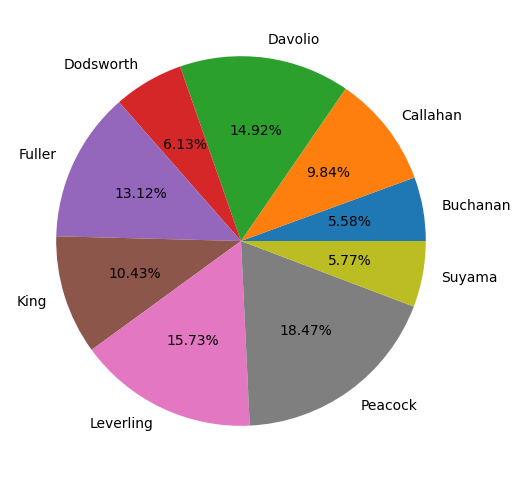

In [87]:
# El grafico circular kind = pie
plt.figure(figsize=(6,6)) #(tamaño cuadrado)
plt.pie(pedidos_comercial['Importe'],labels=pedidos_comercial['Comercial'],autopct='%1.2f%%') #primero va la metrica, en este caso el importe, autopct para ver el porcentaje
plt.show()

In [ ]:
# Grafico de lineas
pedidos['Fecha de Pedido'] = pd.to_datetime(pedidos['Fecha de Pedido'])
# Para obtener el dia
pedidos['Dia'] = pedidos['Fecha de Pedido'].dt.day
# Para ver el mes
pedidos['Mes'] = pedidos['Fecha de Pedido'].dt.month
# Para obtener el año
pedidos['Año'] = pedidos['Fecha de Pedido'].dt.year
# Para obtener el mes en letras
pedidos['Mes letras'] = pedidos['Fecha de Pedido'].dt.month_name()
#pedidos['Mes letras'] = pedidos['Fecha de Pedido'].dt.strftime('%B') # otra manera de tenerlo tambien

pedidos

In [91]:
# Agrupar el importe por mes letras
meses_pedidos = pedidos.groupby('Mes letras').Importe.sum()
meses_pedidos = pd.DataFrame(meses_pedidos).reset_index()
# vamos a hacer una lista de los meses en orden 
orden_meses = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
                'September', 'October', 'November', 'December']
meses_pedidos['Mes letras']=pd.Categorical(meses_pedidos['Mes letras'],categories=orden_meses,ordered=True)
#Ordenamos el dataframe
meses_pedidos = meses_pedidos.sort_values("Mes letras")

<Figure size 1200x500 with 0 Axes>

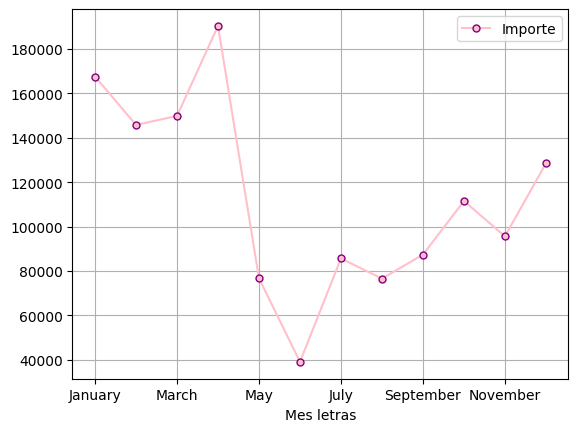

In [92]:
# reservar la figura
plt.figure(figsize=(12,5)) # Lo hacemos apaisado
# relleno del marcador markedfacecolor
# el borde del marcador markeredgecolor
# el tamaño del marcador markersize
meses_pedidos.plot(kind='line',x='Mes letras',marker='o',color='pink',
                   markerfacecolor='pink',
                   markeredgecolor='purple',
                   markersize=5)
plt.grid(True) # si no queremos que se vea rejilla por detras 'False'
plt.show()